In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\gandh\Downloads\Datasets\humana\TAMU_FINAL_DATASET_2018\TAMU_FINAL_DATASET_2018.csv")

In [3]:
df.shape

(100000, 448)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [5]:
df.head(1)

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,ID,AGE,AMI_FLAG,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,CON_VISIT_04_Q01,CON_VISIT_04_Q02,CON_VISIT_04_Q03,CON_VISIT_04_Q04,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
count,100000.000000,100000.000000,100000.000000,99970.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000
mean,50000.500000,72.770440,0.027260,0.289367,1.138959,1.028531,0.44411,0.446700,0.448490,0.446560,...,0.520610,0.160920,0.027480,0.012910,0.131820,0.389160,0.369960,0.46998,0.16429,0.464400
std,28867.657797,9.715514,0.162841,0.455188,0.946879,0.758254,1.34770,1.315118,1.392324,1.379421,...,0.499578,0.367459,0.163478,0.112887,0.338297,0.487562,0.482796,0.49910,0.37054,0.498734
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,25000.750000,68.000000,0.000000,0.000000,0.522000,0.570000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
50%,50000.500000,73.000000,0.000000,0.000000,0.862000,0.891000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
75%,75000.250000,79.000000,0.000000,1.000000,1.414000,1.306000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.00000,1.000000
max,100000.000000,95.000000,1.000000,3.000000,15.120000,15.704000,88.00000,70.000000,52.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000


In [7]:
#list of columns that contain null values
l=df.columns[df.isna().any()].tolist()

In [8]:
#List of columns that have only one value
singlevaluedcol=[]
for i in df.columns:
    if df[i].nunique==1:
        singlevaluedcol.append(i)
        

In [9]:
#Creating a dictionary to identify Column names as keys and number of null values in the column as the corresponding value
d={}
for i in l:
    d[i]=len(df[df[i].isnull()])

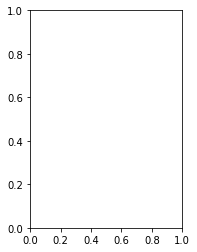

In [10]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)

Text(0.5,1,'Number of Members males or females in the dataset')

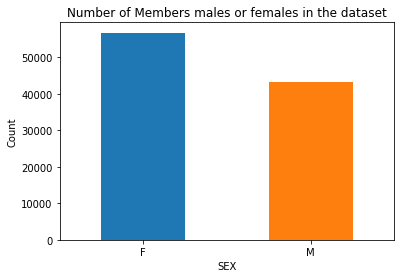

In [11]:
#Plot for Male and female count for humana members
df.groupby('SEX_CD').count()['ID'].plot.bar()
plt.xlabel("SEX")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Number of Members males or females in the dataset")
#df.groupby(['SEX_CD','AMI_FLAG']).count()['ID'].plot.bar()

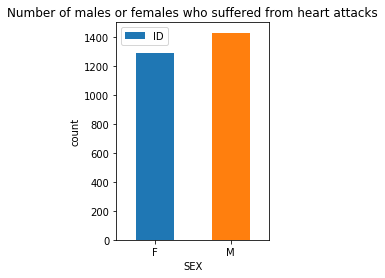

In [12]:
plt.subplot(1,2,2)
df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'].plot.bar(legend=True)
plt.xlabel("SEX")
plt.ylabel("count")
plt.title("Number of males or females who suffered from heart attacks")
plt.xticks(rotation=0)
plt.show()

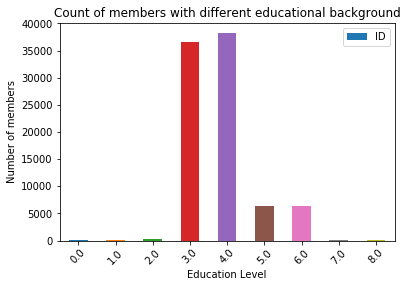

In [13]:
df.groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Education Level")
plt.ylabel("Number of members")
plt.title("Count of members with different educational background")
plt.xticks(rotation=45)
plt.show()

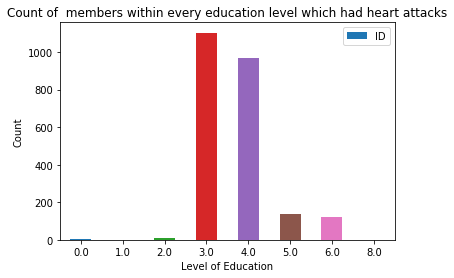

In [14]:
df[df['AMI_FLAG']==1].groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Level of Education")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of  members within every education level which had heart attacks")
plt.show()

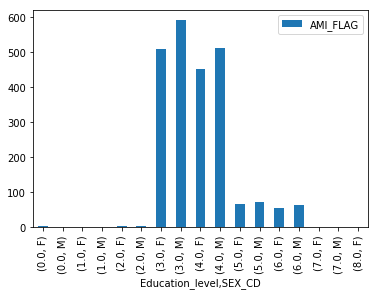

In [15]:
pd.pivot_table(df,index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)



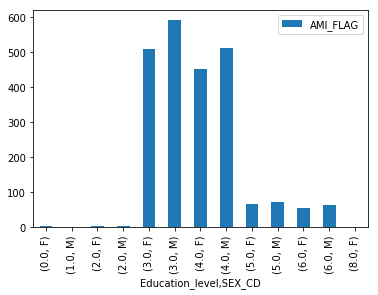

In [16]:
pd.pivot_table(df[df['AMI_FLAG']==1],index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)


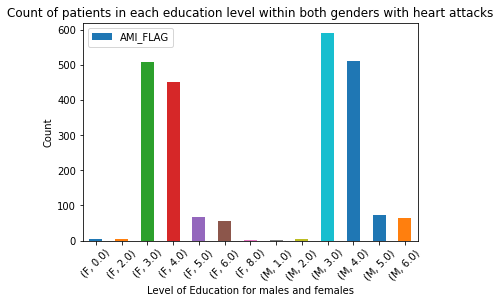

In [17]:
df[df['AMI_FLAG']==1].groupby(['SEX_CD','Education_level']).count()['AMI_FLAG'].plot.bar(stacked=True,legend=True)
plt.xlabel("Level of Education for males and females")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Count of patients in each education level within both genders with heart attacks")
plt.show()

In [18]:
l=list(d.keys())

In [19]:
df.shape

(100000, 448)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [21]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Identifying number of unique values in each columns
k={}
for i in df.columns:
    k[i]=df[i].nunique()

Text(0.5,1,'Age dependency on heart attacks')

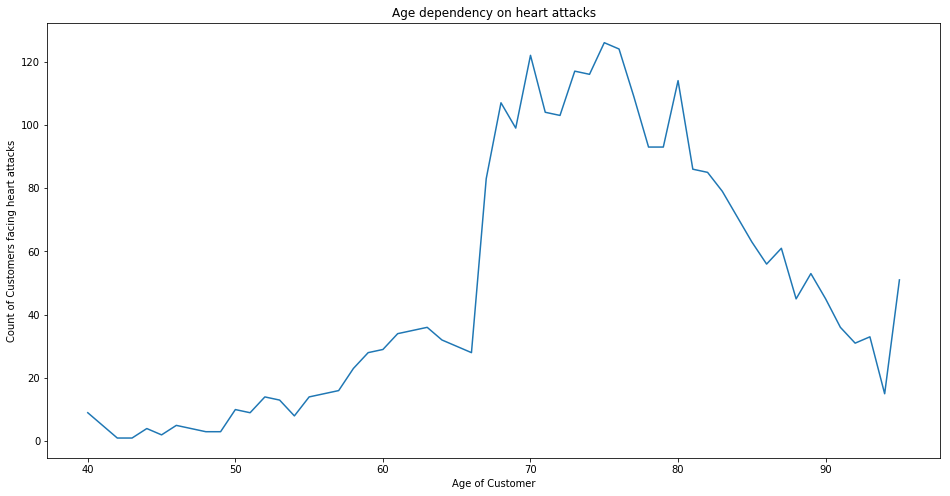

In [23]:
#Age Vs Heart attacks relationships
df[df['AMI_FLAG']==1].groupby('AGE').count()['ID'].plot(figsize=(16,8))
plt.xlabel("Age of Customer")
plt.ylabel("Count of Customers facing heart attacks")
plt.title("Age dependency on heart attacks")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

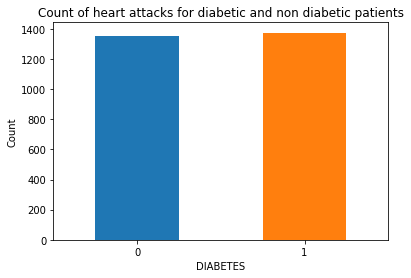

In [24]:
df[df['AMI_FLAG']==1].groupby('DIABETES').count()['ID'].plot.bar()
plt.ylabel("Count")
plt.title("Count of heart attacks for diabetic and non diabetic patients")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

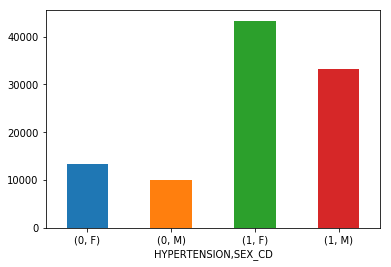

In [25]:
df.groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

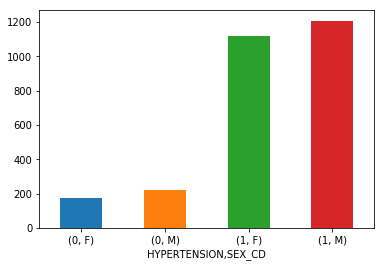

In [26]:
df[df['AMI_FLAG']==1].groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

In [27]:
t=df.groupby(['Education_level','SEX_CD']).count()['ID']

Text(0.5,1,'Count by Education Level and gender')

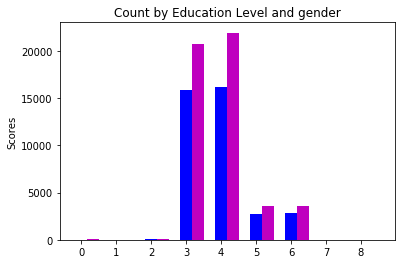

In [28]:
N=len(df.groupby('Education_level'))
men=[]
women=[]
for j in range(0,N):
    women.append(t.loc[j][0])
    try:
        men.append(t.loc[j][1])
        
    except:
        men.append(0)
men_means = tuple(men)
women_means = tuple(women)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1=ax.bar(ind,men_means,color='b',width=width)
rects2=ax.bar(ind+width,women_means,color='m',width=width)
#rects1 = ax.bar(ind, men_means, width, color='r')
plt.xticks(ind)
ax.set_ylabel('Scores')
ax.set_title('Count by Education Level and gender')

In [29]:
df.columns[0:50]

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT', 'DUAL', 'INSTITUTIONAL',
       'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD', 'CON_VISIT_04_Q01',
       'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03', 'CON_VISIT_04_Q04',
       'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02', 'CON_VISIT_21_Q03',
       'CON_VISIT_03_Q02', 'CON_VISIT_03_Q04', 'CON_VISIT_05_Q02',
       'CON_VISIT_05_Q04', 'CON_VISIT_09_Q02', 'CON_VISIT_10_Q02',
       'CON_VISIT_18_Q02', 'CON_VISIT_19_Q04', 'CON_VISIT_23_Q02',
       'CON_VISIT_24_Q02', 'CON_VISIT_30_Q01', 'CON_VISIT_30_Q02',
       'CON_VISIT_30_Q04', 'CON_VISIT_32_Q02', 'CON_VISIT_33_Q04',
       'CON_VISIT_06_Q01', 'CON_VISIT_06_Q02', 'CON_VISIT_06_Q03',
       'CON_VISIT_10_Q01', 'CON_VISIT_19_Q03', 'CON_VISIT_33_Q02',
       'CON_VISIT_08_Q02', 'CON_VISIT_10_Q03', 'CON_VISIT_10_Q04',
       'CON_VISIT_24_Q04', 'CON_VISIT_08_Q01', 'CON_

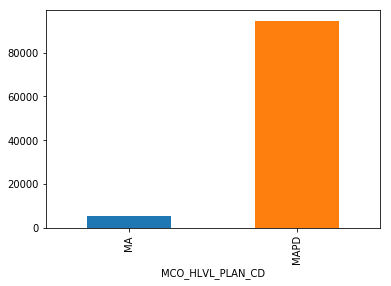

In [30]:
df.groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

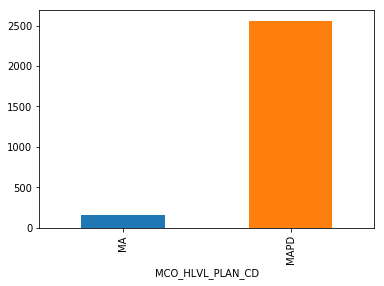

In [31]:
df[df['AMI_FLAG']==1].groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

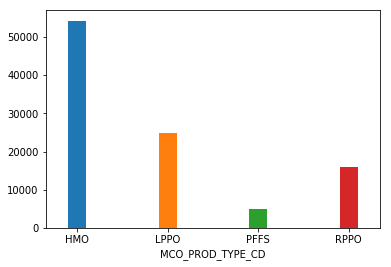

In [32]:
df.groupby('MCO_PROD_TYPE_CD').count()['ID'].plot.bar(width=0.2)
plt.xticks(rotation=0)

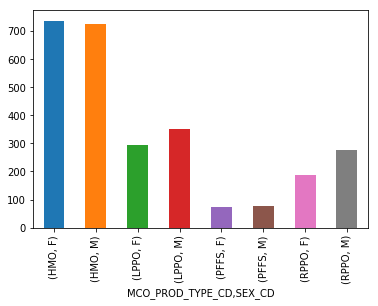

In [33]:
df[df['AMI_FLAG']==1].groupby(['MCO_PROD_TYPE_CD','SEX_CD']).count()['ID'].plot.bar()

In [34]:
#df[df['AMI_FLAG']==1].count() #2726

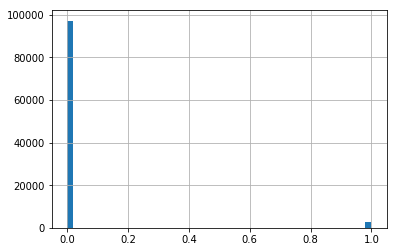

In [35]:
df['AMI_FLAG'].hist(bins=50)

In [36]:
df.columns[0:50]

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT', 'DUAL', 'INSTITUTIONAL',
       'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD', 'CON_VISIT_04_Q01',
       'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03', 'CON_VISIT_04_Q04',
       'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02', 'CON_VISIT_21_Q03',
       'CON_VISIT_03_Q02', 'CON_VISIT_03_Q04', 'CON_VISIT_05_Q02',
       'CON_VISIT_05_Q04', 'CON_VISIT_09_Q02', 'CON_VISIT_10_Q02',
       'CON_VISIT_18_Q02', 'CON_VISIT_19_Q04', 'CON_VISIT_23_Q02',
       'CON_VISIT_24_Q02', 'CON_VISIT_30_Q01', 'CON_VISIT_30_Q02',
       'CON_VISIT_30_Q04', 'CON_VISIT_32_Q02', 'CON_VISIT_33_Q04',
       'CON_VISIT_06_Q01', 'CON_VISIT_06_Q02', 'CON_VISIT_06_Q03',
       'CON_VISIT_10_Q01', 'CON_VISIT_19_Q03', 'CON_VISIT_33_Q02',
       'CON_VISIT_08_Q02', 'CON_VISIT_10_Q03', 'CON_VISIT_10_Q04',
       'CON_VISIT_24_Q04', 'CON_VISIT_08_Q01', 'CON_

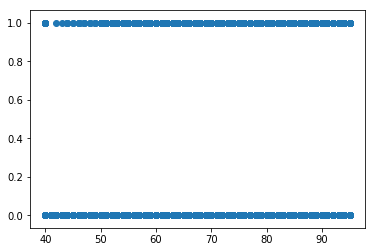

In [37]:
plt.scatter(df['AGE'],df['AMI_FLAG'])

Text(0.5,1,'Age wise distribution of Members facing heart attacks')

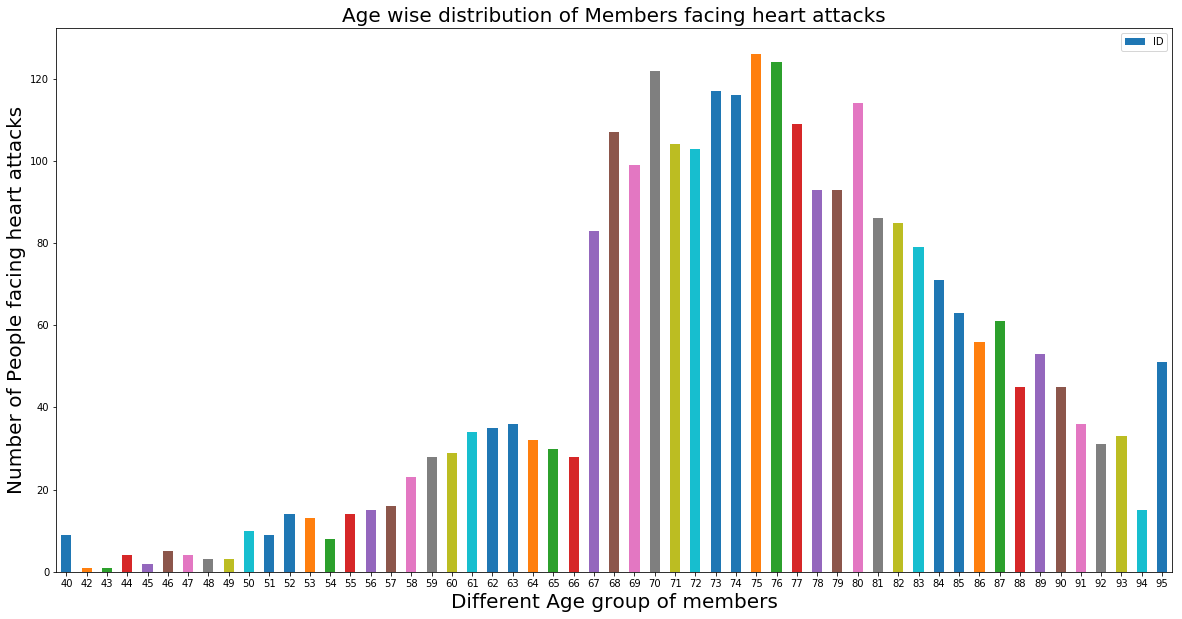

In [38]:

df[df['AMI_FLAG']==1].groupby('AGE').count()['ID'].plot.bar(figsize=(20,10),legend=True,fontsize=10)
plt.xticks(rotation=0)
plt.xlabel("Different Age group of members",fontsize=20)
plt.ylabel("Number of People facing heart attacks",fontsize=20)
plt.title("Age wise distribution of Members facing heart attacks",fontsize=20)
#df[df['AMI_FLAG']==0].groupby('AGE').count()['ID'].plot.bar(figsize=(20,10),legend=True,fontsize=10)

In [39]:
from pandas.tools.plotting import scatter_matrix

In [40]:
df.columns[0:20]

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT', 'DUAL', 'INSTITUTIONAL',
       'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD', 'CON_VISIT_04_Q01',
       'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03', 'CON_VISIT_04_Q04',
       'CON_VISIT_21_Q01'],
      dtype='object')

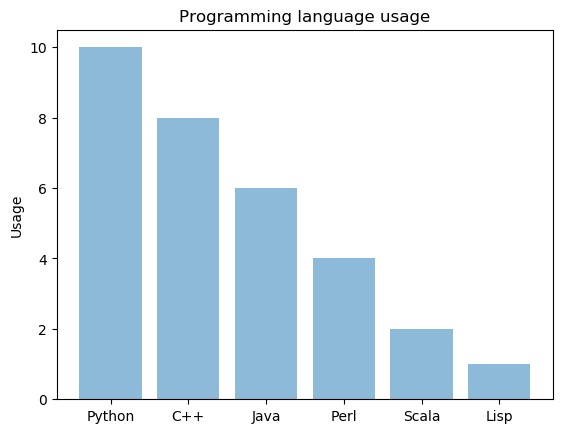

In [41]:
import matplotlib.pyplot as plt; plt.rcdefaults()
 
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

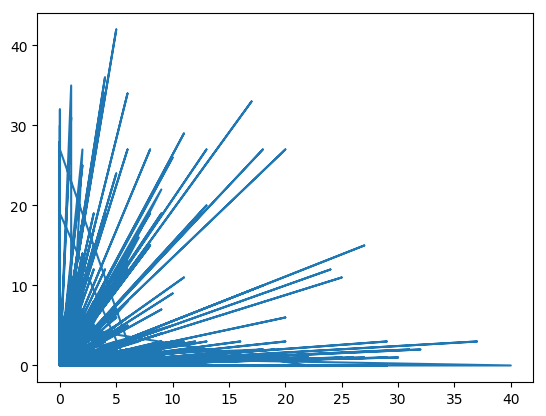

In [42]:
plt.plot(df['CON_VISIT_01_Q01'],df['CON_VISIT_01_Q02'])

In [48]:
x1=df['AGE'].argsort()

In [49]:
x=df['AGE'][x1]

In [50]:
y=df['CON_VISIT_01_Q02'][x1]

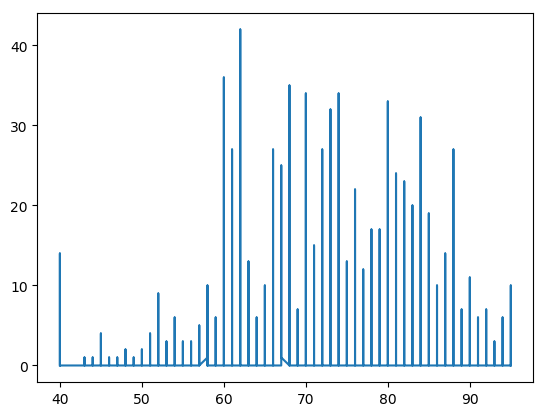

In [51]:
plt.plot(x,y)

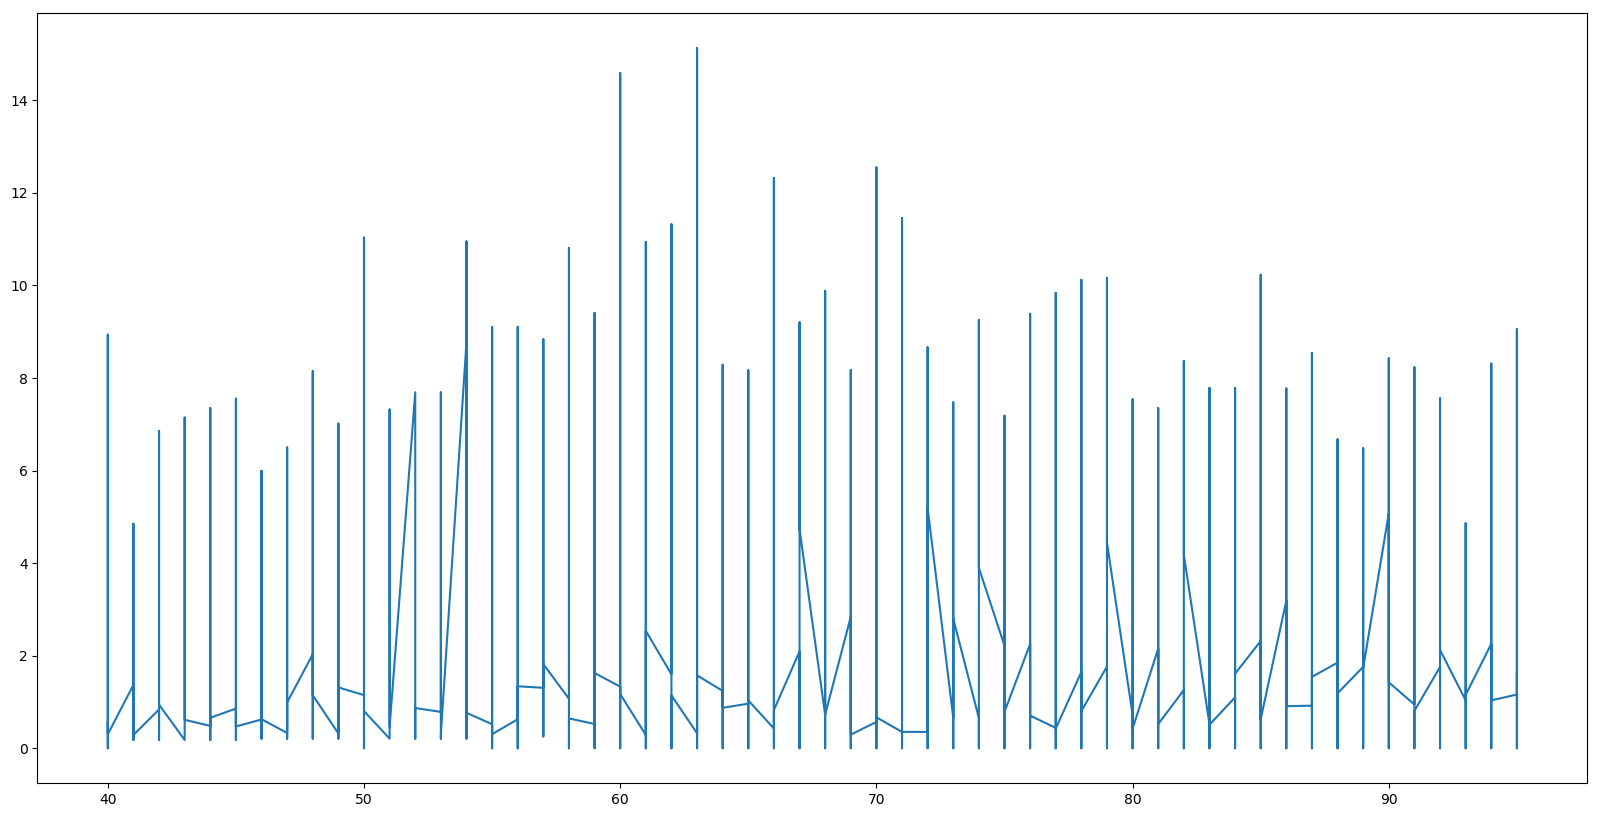

In [52]:
plt.figure(figsize=(20,10))
plt.plot(df['AGE'][df['AGE'].argsort()],df['RECON_MA_RISK_SCORE_NBR'][df['AGE'].argsort()])
#plt.scatter(df['AMI_FLAG'][df['AGE'].argsort()],df['RECON_MA_RISK_SCORE_NBR'][df['AGE'].argsort()])

In [53]:
df.dropna(axis=0,subset=['SEX_CD'],inplace=True)

df['DUAL'].dropna(axis=0,inplace=True)

df.dropna(axis=0,subset=['ESRD_IND'],inplace=True)

df.dropna(axis=0,subset=['HOSPICE_IND'],how='any',inplace=True)

df.dropna(axis=0,subset=['ORIG_REAS_ENTITLE_CD'],inplace=True)

df.dropna(axis=0,subset=['PCP_ASSIGNMENT'],inplace=True)

df.dropna(axis=0,subset=['DUAL'],inplace=True)

df.dropna(axis=0,subset=['INSTITUTIONAL'],inplace=True)

df.dropna(axis=0,subset=['LIS'],inplace=True)

df.dropna(axis=0,subset=['MCO_HLVL_PLAN_CD'],inplace=True)

df.dropna(axis=0,subset=['MCO_PROD_TYPE_CD'],inplace=True)

df.drop(axis=1,columns=['Diab_Type'],inplace=True)

df.drop(axis=1,columns=['Dwelling_Type'],inplace=True)

df.dropna(axis=0,subset=['Education_level'],inplace=True)

df.dropna(axis=0,subset=['Length_residence'],inplace=True)

df.dropna(axis=0,subset=['Est_BMI_decile'],inplace=True)

df.dropna(axis=0,subset=['Num_person_household'],inplace=True)

df.dropna(axis=0,subset=['College'],inplace=True)

df.dropna(axis=0,subset=['Online_purchaser'],inplace=True)

df.dropna(axis=0,subset=['Online_User'],inplace=True)


df.dropna(axis=0,subset=['Pct_above_poverty_line'],inplace=True)


df.dropna(axis=0,subset=['Pct_below_poverty_line'],inplace=True)

df.dropna(axis=0,subset=['Decile_struggle_Med_lang'],inplace=True)

df.dropna(axis=0,subset=['Home_value'],inplace=True)

df.dropna(axis=0,subset=['Est_Net_worth'],inplace=True)

df.dropna(axis=0,subset=['Est_income'],inplace=True)

df.dropna(axis=0,subset=['Index_Health_ins_engage'],inplace=True)

df.dropna(axis=0,subset=['Index_Health_ins_influence'],inplace=True)

df.dropna(axis=0,subset=['Population_density_centile_ST'],inplace=True)

df.dropna(axis=0,subset=['Population_density_centile_US'],inplace=True)

C:\Users\gandh\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


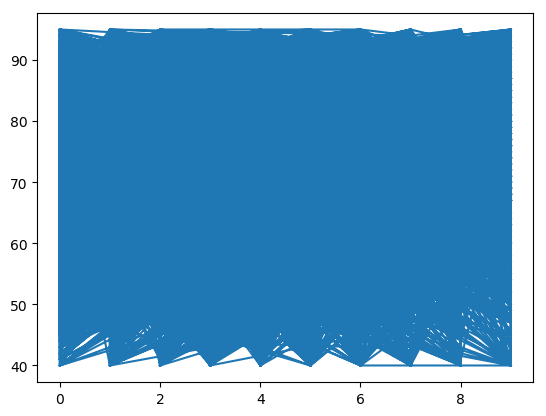

In [54]:
plt.plot(df['Est_BMI_decile'][df['Est_BMI_decile'].argsort()],df['AGE'][df['Est_BMI_decile'].argsort()])

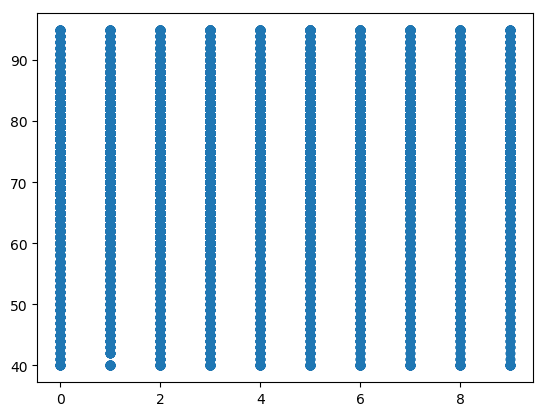

In [55]:
plt.scatter(df['Est_BMI_decile'],df['AGE'])

In [56]:
df['Index_Health_ins_engage'][df['Index_Health_ins_engage'].argsort()]

C:\Users\gandh\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


74669    3.0
24681    5.0
24677    1.0
24675    NaN
24672    1.0
61524    0.0
24668    NaN
61525    NaN
61530    2.0
24662    NaN
24683    1.0
61539    1.0
24654    NaN
24647    0.0
61544    1.0
24644    3.0
24643    1.0
61550    0.0
24637    NaN
61556    0.0
61557    3.0
61542    1.0
61523    0.0
24694    NaN
24695    2.0
24762    2.0
61477    NaN
61480    NaN
24755    3.0
61485    NaN
        ... 
57586    NaN
21151    0.0
63440    NaN
39269    0.0
47319    0.0
57570    0.0
63469    1.0
4585     0.0
47343    1.0
21130    1.0
13599    0.0
31662    NaN
4740     2.0
4846     NaN
47242    1.0
21265    1.0
51887    1.0
31615    1.0
42532    NaN
21240    NaN
57641    0.0
21202    1.0
47271    NaN
39280    1.0
47273    0.0
63403    3.0
31653    NaN
31655    NaN
5097     5.0
18997    NaN
Name: Index_Health_ins_engage, Length: 74670, dtype: float64

In [57]:
df.select_dtypes(include='int64').columns

Index(['ID', 'AGE', 'AMI_FLAG', 'CON_VISIT_04_Q01', 'CON_VISIT_04_Q02',
       'CON_VISIT_04_Q03', 'CON_VISIT_04_Q04', 'CON_VISIT_21_Q01',
       'CON_VISIT_21_Q02', 'CON_VISIT_21_Q03',
       ...
       'COL', 'COL_GAP', 'AMM', 'AMM_GAP', 'DIAB_PASS', 'ACE_PASS',
       'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG', 'STATIN_ELIG'],
      dtype='object', length=417)

In [58]:
df.select_dtypes('float64').columns

Index(['ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'Education_level', 'Length_residence',
       'Est_BMI_decile', 'Num_person_household', 'College', 'Online_purchaser',
       'Online_User', 'Pct_above_poverty_line', 'Pct_below_poverty_line',
       'Decile_struggle_Med_lang', 'Home_value', 'Est_Net_worth', 'Est_income',
       'Index_Health_ins_engage', 'Index_Health_ins_influence',
       'Population_density_centile_ST', 'Population_density_centile_US'],
      dtype='object')

In [59]:
df.groupby('Online_User').count()['ID']

Online_User
0.0    26134
1.0    48536
Name: ID, dtype: int64

In [60]:
df.groupby('Online_purchaser').count()['ID']

Online_purchaser
0.0    59148
1.0    15522
Name: ID, dtype: int64